Accuracy: 0.75
Confusion Matrix:
 [[ 43  37]
 [ 20 131]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.54      0.60        80
           1       0.78      0.87      0.82       151

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.75      0.75       231



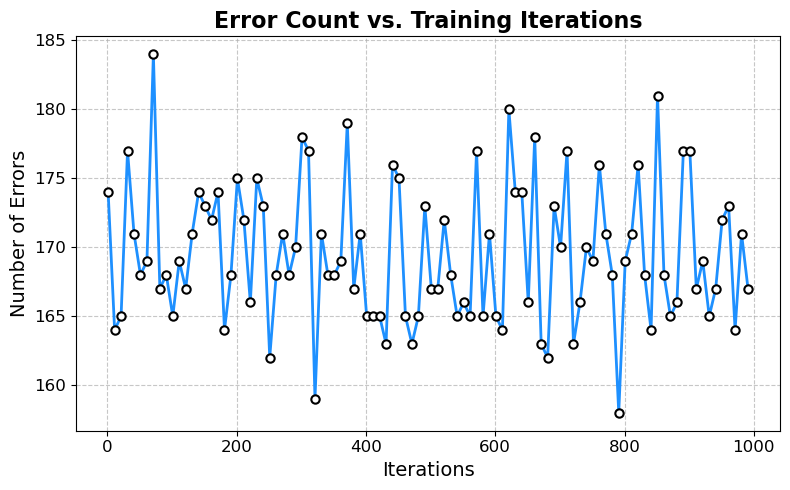

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the dataset
url = "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes"
data = pd.read_csv(url, header=None, delim_whitespace=True)

# Process the data, converting sparse format into dense format
def sparse_to_dense(sparse_str):
    dense_vector = np.zeros(8)
    for item in sparse_str:
        index, value = map(float, item.split(":"))
        dense_vector[int(index) - 1] = value
    return dense_vector

# Convert feature columns into dense numerical format
X = np.array([sparse_to_dense(row[1:]) for row in data.values])
y = data.iloc[:, 0].values  

# Convert labels from -1, 1 to 0, 1
y = np.where(y == -1, 0, 1)

# Split it into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Perceptron class with error tracking
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.errors = []  

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            errors = 0
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._activation_function(linear_output)
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
                errors += int(update != 0.0)  # Count errors (updates)
            self.errors.append(errors)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._activation_function(linear_output)
        return y_predicted

    def _activation_function(self, x):
        return np.where(x >= 0, 1, 0)

# Initialize and train the Perceptron
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron.fit(X_train, y_train)

# Predict on the test data
y_pred = perceptron.predict(X_test)

# Print accuracy, confusion matrix, and classification
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the error count over iterations
plt.figure(figsize=(8, 5))
plt.plot(
    range(1, perceptron.n_iters + 1, 10), 
    perceptron.errors[::10], 
    marker='o', 
    linestyle='-', 
    color='dodgerblue', 
    markersize=6, 
    linewidth=2, 
    markerfacecolor='white', 
    markeredgewidth=1.5,
    markeredgecolor='black'
)
plt.title("Error Count vs. Training Iterations", fontsize=16, fontweight='bold')
plt.xlabel("Iterations", fontsize=14)
plt.ylabel("Number of Errors", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()